In [1]:
import pandas as pd
!pip install xlrd
!pip install openpyxl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!pip install psycopg2
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session

In [3]:

excel_data_df = pd.read_excel('US Weather Data .xlsx',engine='openpyxl')

json_str = excel_data_df.to_json()

print('Excel Sheet to JSON:\n', json_str)



Excel Sheet to JSON:
 {"February 2021 - January 2022 Contiguous U.S. Statewide Average Temperature":{"0":"Units: Degrees Fahrenheit","1":"Missing: -99","2":"Location ID","3":100,"4":200,"5":300,"6":400,"7":500,"8":600,"9":700,"10":800,"11":900,"12":1000,"13":1100,"14":1200,"15":1300,"16":1400,"17":1500,"18":1600,"19":1700,"20":1800,"21":1900,"22":2000,"23":2100,"24":2200,"25":2300,"26":2400,"27":2500,"28":2600,"29":2700,"30":2800,"31":2900,"32":3000,"33":3100,"34":3200,"35":3300,"36":3400,"37":3500,"38":3600,"39":3700,"40":3800,"41":3900,"42":4000,"43":4100,"44":4200,"45":4300,"46":4400,"47":4500,"48":4600,"49":4700,"50":4800},"Unnamed: 1":{"0":null,"1":"Rank out of 127 Years","2":"Location","3":"Alabama","4":"Arizona","5":"Arkansas","6":"California","7":"Colorado","8":"Connecticut","9":"Delaware","10":"Florida","11":"Georgia","12":"Idaho","13":"Illinois","14":"Indiana","15":"Iowa","16":"Kansas","17":"Kentucky","18":"Louisiana","19":"Maine","20":"Maryland","21":"Massachusetts","22":"Mi

In [4]:
#from json format to dataframe
df=pd.read_json(json_str,orient='index')
print(df)


                                                                           0   \
February 2021 - January 2022 Contiguous U.S. St...  Units: Degrees Fahrenheit   
Unnamed: 1                                                               None   
Unnamed: 2                                                               None   
Unnamed: 3                                                               None   
Unnamed: 4                                                               None   
Unnamed: 5                                                               None   

                                                                       1   \
February 2021 - January 2022 Contiguous U.S. St...           Missing: -99   
Unnamed: 1                                          Rank out of 127 Years   
Unnamed: 2                                                           None   
Unnamed: 3                                                           None   
Unnamed: 4                                     

In [5]:
# display headers
df.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
February 2021 - January 2022 Contiguous U.S. Statewide Average Temperature,Units: Degrees Fahrenheit,Missing: -99,Location ID,100,200,300,400,500,600,700,...,3900,4000,4100,4200,4300,4400,4500,4600,4700,4800
Unnamed: 1,None,Rank out of 127 Years,Location,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Unnamed: 2,None,None,Value,64,62.2,61.1,60.4,47.5,51,57,...,47.4,58.7,66,50.8,44.3,56.8,48,53.2,44.8,43.6
Unnamed: 3,None,None,Rank,97,125,89,124,124,121,118,...,118,91,110,125,118,116,118,110,116,123
Unnamed: 4,None,None,Anomaly (1901-2000 base period),0.9,2.8,0.7,3.1,2.9,2.9,2.8,...,2.9,1,1.4,3.2,2.9,1.9,1.8,1.6,2.5,2.9


In [6]:
# changing column types from integer to string 

df.columns=df.columns.astype(str)
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50'],
      dtype='object')

In [7]:
data1_df=df.transpose()
data1_df.head()

,February 2021 - January 2022 Contiguous U.S. Statewide Average Temperature,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 127 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,64,97,0.9,63.1
4,200,Arizona,62.2,125,2.8,59.4


In [8]:
df1=data1_df.rename(columns={'Unnamed: 1' :'Location','Unnamed: 2':'Average','Unnamed: 5':'Mean'})
df1.head()

,February 2021 - January 2022 Contiguous U.S. Statewide Average Temperature,Location,Average,Unnamed: 3,Unnamed: 4,Mean
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 127 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,64,97,0.9,63.1
4,200,Arizona,62.2,125,2.8,59.4


In [9]:
new_df=df1[['Location','Average','Mean']]
new_df.head()


,Location,Average,Mean
0,None,None,None
1,Rank out of 127 Years,None,None
2,Location,Value,1901-2000 Mean
3,Alabama,64,63.1
4,Arizona,62.2,59.4


In [10]:
clean_df=new_df.drop(new_df.index[[0,2]])

clean_df

,Location,Average,Mean
1,Rank out of 127 Years,None,None
3,Alabama,64,63.1
4,Arizona,62.2,59.4
5,Arkansas,61.1,60.4
6,California,60.4,57.3
7,Colorado,47.5,44.6
8,Connecticut,51,48.1
9,Delaware,57,54.2
10,Florida,72.1,70.1
11,Georgia,64.5,63.4


In [11]:
clean_df1=clean_df.drop(clean_df.index[0])
clean_df1

,Location,Average,Mean
3,Alabama,64,63.1
4,Arizona,62.2,59.4
5,Arkansas,61.1,60.4
6,California,60.4,57.3
7,Colorado,47.5,44.6
8,Connecticut,51,48.1
9,Delaware,57,54.2
10,Florida,72.1,70.1
11,Georgia,64.5,63.4
12,Idaho,45.2,42.6


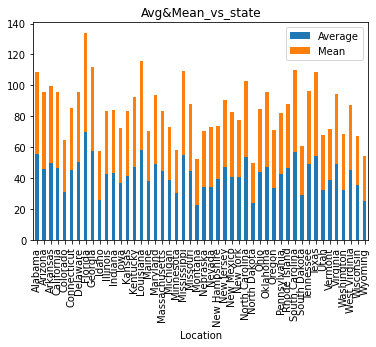

In [130]:
clean_df1.plot(x='Location',y=['Average','Mean'],kind='bar',stacked=True,title='Avg&Mean_vs_state')

plt.savefig('../static/images/Avg&Mean_vs_state.png')
plt.show()

In [13]:
engine = sqlalchemy.create_engine("sqlite:///../nps.sqlite",echo=False)
connection = engine.connect()

In [14]:
clean_df1.to_sql("Summary_weather_data", connection, index=False,if_exists="replace")

In [15]:
pd.read_sql("SELECT * FROM Summary_weather_data", connection)

,Location,Average,Mean
0,Alabama,64,63.1
1,Arizona,62.2,59.4
2,Arkansas,61.1,60.4
3,California,60.4,57.3
4,Colorado,47.5,44.6
5,Connecticut,51,48.1
6,Delaware,57,54.2
7,Florida,72.1,70.1
8,Georgia,64.5,63.4
9,Idaho,45.2,42.6


In [16]:
Jan_df = pd.read_excel('US Weather Data .xlsx',sheet_name='January',engine='openpyxl')
jan1_str = Jan_df.to_json()

print('Excel Sheet to JSON:\n', jan1_str)

Excel Sheet to JSON:
 {"January 2022 Contiguous U.S. Statewide Average Temperature":{"0":"Units: Degrees Fahrenheit","1":"Missing: -99","2":"Location ID","3":100,"4":200,"5":300,"6":400,"7":500,"8":600,"9":700,"10":800,"11":900,"12":1000,"13":1100,"14":1200,"15":1300,"16":1400,"17":1500,"18":1600,"19":1700,"20":1800,"21":1900,"22":2000,"23":2100,"24":2200,"25":2300,"26":2400,"27":2500,"28":2600,"29":2700,"30":2800,"31":2900,"32":3000,"33":3100,"34":3200,"35":3300,"36":3400,"37":3500,"38":3600,"39":3700,"40":3800,"41":3900,"42":4000,"43":4100,"44":4200,"45":4300,"46":4400,"47":4500,"48":4600,"49":4700,"50":4800},"Unnamed: 1":{"0":null,"1":"Rank out of 128 Years","2":"Location","3":"Alabama","4":"Arizona","5":"Arkansas","6":"California","7":"Colorado","8":"Connecticut","9":"Delaware","10":"Florida","11":"Georgia","12":"Idaho","13":"Illinois","14":"Indiana","15":"Iowa","16":"Kansas","17":"Kentucky","18":"Louisiana","19":"Maine","20":"Maryland","21":"Massachusetts","22":"Michigan","23":"Mi

In [17]:
#from json format to dataframe
Jan_df=pd.read_json(jan1_str,orient='index')
print(Jan_df)


                                                                           0   \
January 2022 Contiguous U.S. Statewide Average ...  Units: Degrees Fahrenheit   
Unnamed: 1                                                               None   
Unnamed: 2                                                               None   
Unnamed: 3                                                               None   
Unnamed: 4                                                               None   
Unnamed: 5                                                               None   

                                                                       1   \
January 2022 Contiguous U.S. Statewide Average ...           Missing: -99   
Unnamed: 1                                          Rank out of 128 Years   
Unnamed: 2                                                           None   
Unnamed: 3                                                           None   
Unnamed: 4                                     

In [18]:
jan1_df= Jan_df.transpose()
jan1_df.head()

,January 2022 Contiguous U.S. Statewide Average Temperature,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,43.9,56,-1.2,45.1
4,200,Arizona,43.7,103,3,40.7


In [19]:
january_df=jan1_df.rename(columns={'Unnamed: 1' :'Location','Unnamed: 2':'Average','Unnamed: 5':'Mean'})
january_df.head()

,January 2022 Contiguous U.S. Statewide Average Temperature,Location,Average,Unnamed: 3,Unnamed: 4,Mean
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,43.9,56,-1.2,45.1
4,200,Arizona,43.7,103,3,40.7


In [20]:
new_df=january_df[['Location','Average','Mean']]
new_df.head()

,Location,Average,Mean
0,None,None,None
1,Rank out of 128 Years,None,None
2,Location,Value,1901-2000 Mean
3,Alabama,43.9,45.1
4,Arizona,43.7,40.7


In [21]:
clean_df=new_df.drop(new_df.index[[0,2]])
clean_df

,Location,Average,Mean
1,Rank out of 128 Years,None,None
3,Alabama,43.9,45.1
4,Arizona,43.7,40.7
5,Arkansas,38.7,39.3
6,California,46.6,42.3
7,Colorado,26.6,23.7
8,Connecticut,24.2,25.4
9,Delaware,31.6,33.3
10,Florida,57.6,57.8
11,Georgia,45.9,46.1


In [22]:
clean_df1=clean_df.drop(clean_df.index[0])
clean_df1

,Location,Average,Mean
3,Alabama,43.9,45.1
4,Arizona,43.7,40.7
5,Arkansas,38.7,39.3
6,California,46.6,42.3
7,Colorado,26.6,23.7
8,Connecticut,24.2,25.4
9,Delaware,31.6,33.3
10,Florida,57.6,57.8
11,Georgia,45.9,46.1
12,Idaho,23.8,22


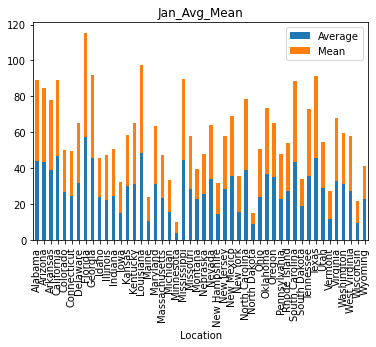

In [23]:
clean_df1.plot(x='Location',y=['Average','Mean'],kind='bar',stacked=True,title='Jan_Avg_Mean')

plt.savefig('../static/images/Jan_Avg_Mean.png')
plt.show()

In [24]:
clean_df1.to_sql("Jan_weather_data", connection, index=False,if_exists="replace")

In [25]:
pd.read_sql("SELECT * FROM Jan_weather_data", connection)

,Location,Average,Mean
0,Alabama,43.9,45.1
1,Arizona,43.7,40.7
2,Arkansas,38.7,39.3
3,California,46.6,42.3
4,Colorado,26.6,23.7
5,Connecticut,24.2,25.4
6,Delaware,31.6,33.3
7,Florida,57.6,57.8
8,Georgia,45.9,46.1
9,Idaho,23.8,22


In [26]:
Feb_df = pd.read_excel('US Weather Data .xlsx',sheet_name='February',engine='openpyxl')
feb_str = Feb_df.to_json()

print('Excel Sheet to JSON:\n', feb_str)

Excel Sheet to JSON:
 {"February 2022 Contiguous U.S. Statewide Average Temperature":{"0":"Units: Degrees Fahrenheit","1":"Missing: -99","2":"Location ID","3":100,"4":200,"5":300,"6":400,"7":500,"8":600,"9":700,"10":800,"11":900,"12":1000,"13":1100,"14":1200,"15":1300,"16":1400,"17":1500,"18":1600,"19":1700,"20":1800,"21":1900,"22":2000,"23":2100,"24":2200,"25":2300,"26":2400,"27":2500,"28":2600,"29":2700,"30":2800,"31":2900,"32":3000,"33":3100,"34":3200,"35":3300,"36":3400,"37":3500,"38":3600,"39":3700,"40":3800,"41":3900,"42":4000,"43":4100,"44":4200,"45":4300,"46":4400,"47":4500,"48":4600,"49":4700,"50":4800},"Unnamed: 1":{"0":null,"1":"Rank out of 128 Years","2":"Location","3":"Alabama","4":"Arizona","5":"Arkansas","6":"California","7":"Colorado","8":"Connecticut","9":"Delaware","10":"Florida","11":"Georgia","12":"Idaho","13":"Illinois","14":"Indiana","15":"Iowa","16":"Kansas","17":"Kentucky","18":"Louisiana","19":"Maine","20":"Maryland","21":"Massachusetts","22":"Michigan","23":"M

In [27]:
#from json format to dataframe
feb_df=pd.read_json(feb_str,orient='index')
print(feb_df)


                                                                           0   \
February 2022 Contiguous U.S. Statewide Average...  Units: Degrees Fahrenheit   
Unnamed: 1                                                               None   
Unnamed: 2                                                               None   
Unnamed: 3                                                               None   
Unnamed: 4                                                               None   
Unnamed: 5                                                               None   

                                                                       1   \
February 2022 Contiguous U.S. Statewide Average...           Missing: -99   
Unnamed: 1                                          Rank out of 128 Years   
Unnamed: 2                                                           None   
Unnamed: 3                                                           None   
Unnamed: 4                                     

In [28]:
#convert table
feb1_df= feb_df.transpose()
feb1_df.head()


,February 2022 Contiguous U.S. Statewide Average Temperature,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,50.1,88,2.1,48
4,200,Arizona,44.2,49,-0.5,44.7


In [29]:
february_df=feb1_df.rename(columns={'Unnamed: 1' :'Location','Unnamed: 2':'Average','Unnamed: 5':'Mean'})
february_df.head()


,February 2022 Contiguous U.S. Statewide Average Temperature,Location,Average,Unnamed: 3,Unnamed: 4,Mean
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,50.1,88,2.1,48
4,200,Arizona,44.2,49,-0.5,44.7


In [30]:
new_df=february_df[['Location','Average','Mean']]
new_df.head()



,Location,Average,Mean
0,None,None,None
1,Rank out of 128 Years,None,None
2,Location,Value,1901-2000 Mean
3,Alabama,50.1,48
4,Arizona,44.2,44.7


In [31]:
clean_df=new_df.drop(new_df.index[[0,2]])
clean_df

,Location,Average,Mean
1,Rank out of 128 Years,None,None
3,Alabama,50.1,48
4,Arizona,44.2,44.7
5,Arkansas,42.2,43.1
6,California,48.1,45.3
7,Colorado,25,27.4
8,Connecticut,30.6,26.3
9,Delaware,39.1,34.4
10,Florida,63.1,59.4
11,Georgia,52.7,48.6


In [32]:
clean_df1=clean_df.drop(clean_df.index[0])
clean_df1

,Location,Average,Mean
3,Alabama,50.1,48
4,Arizona,44.2,44.7
5,Arkansas,42.2,43.1
6,California,48.1,45.3
7,Colorado,25,27.4
8,Connecticut,30.6,26.3
9,Delaware,39.1,34.4
10,Florida,63.1,59.4
11,Georgia,52.7,48.6
12,Idaho,24.5,26.4


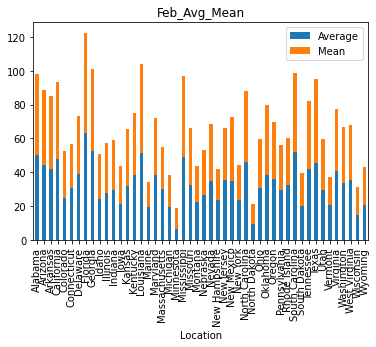

In [33]:
clean_df1.plot(x='Location',y=['Average','Mean'],kind='bar',stacked=True,title='Feb_Avg_Mean')

plt.savefig('../static/images/Feb_Avg_Mean.png')
plt.show()

In [34]:
clean_df1.to_sql("Feb_weather_data", connection, index=False,if_exists="replace")

In [35]:
pd.read_sql("SELECT * FROM Feb_weather_data", connection)

,Location,Average,Mean
0,Alabama,50.1,48
1,Arizona,44.2,44.7
2,Arkansas,42.2,43.1
3,California,48.1,45.3
4,Colorado,25,27.4
5,Connecticut,30.6,26.3
6,Delaware,39.1,34.4
7,Florida,63.1,59.4
8,Georgia,52.7,48.6
9,Idaho,24.5,26.4


In [36]:
march_df = pd.read_excel('US Weather Data .xlsx',sheet_name='March',engine='openpyxl')
mar_str = march_df.to_json()

print('Excel Sheet to JSON:\n', mar_str)

Excel Sheet to JSON:
 {"March 2022 Contiguous U.S. Statewide Average Temperature":{"0":"Units: Degrees Fahrenheit","1":"Missing: -99","2":"Location ID","3":100,"4":200,"5":300,"6":400,"7":500,"8":600,"9":700,"10":800,"11":900,"12":1000,"13":1100,"14":1200,"15":1300,"16":1400,"17":1500,"18":1600,"19":1700,"20":1800,"21":1900,"22":2000,"23":2100,"24":2200,"25":2300,"26":2400,"27":2500,"28":2600,"29":2700,"30":2800,"31":2900,"32":3000,"33":3100,"34":3200,"35":3300,"36":3400,"37":3500,"38":3600,"39":3700,"40":3800,"41":3900,"42":4000,"43":4100,"44":4200,"45":4300,"46":4400,"47":4500,"48":4600,"49":4700,"50":4800},"Unnamed: 1":{"0":null,"1":"Rank out of 128 Years","2":"Location","3":"Alabama","4":"Arizona","5":"Arkansas","6":"California","7":"Colorado","8":"Connecticut","9":"Delaware","10":"Florida","11":"Georgia","12":"Idaho","13":"Illinois","14":"Indiana","15":"Iowa","16":"Kansas","17":"Kentucky","18":"Louisiana","19":"Maine","20":"Maryland","21":"Massachusetts","22":"Michigan","23":"Minn

In [37]:
#from json format to dataframe
mar_df=pd.read_json(mar_str,orient='index')
print(mar_df)


                                                                           0   \
March 2022 Contiguous U.S. Statewide Average Te...  Units: Degrees Fahrenheit   
Unnamed: 1                                                               None   
Unnamed: 2                                                               None   
Unnamed: 3                                                               None   
Unnamed: 4                                                               None   
Unnamed: 5                                                               None   

                                                                       1   \
March 2022 Contiguous U.S. Statewide Average Te...           Missing: -99   
Unnamed: 1                                          Rank out of 128 Years   
Unnamed: 2                                                           None   
Unnamed: 3                                                           None   
Unnamed: 4                                     

In [38]:
#convert table
mar_df= mar_df.transpose()
mar_df.head()


,March 2022 Contiguous U.S. Statewide Average Temperature,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,57.5,86,2.4,55.1
4,200,Arizona,51.8,96,2.3,49.5


In [39]:
march_df=mar_df.rename(columns={'Unnamed: 1' :'Location','Unnamed: 2':'Average','Unnamed: 5':'Mean'})
march_df.head()

,March 2022 Contiguous U.S. Statewide Average Temperature,Location,Average,Unnamed: 3,Unnamed: 4,Mean
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,57.5,86,2.4,55.1
4,200,Arizona,51.8,96,2.3,49.5


In [40]:
new_df=march_df[['Location','Average','Mean']]
new_df.head()

,Location,Average,Mean
0,None,None,None
1,Rank out of 128 Years,None,None
2,Location,Value,1901-2000 Mean
3,Alabama,57.5,55.1
4,Arizona,51.8,49.5


In [41]:
clean_df=new_df.drop(new_df.index[[0,2]])
clean_df

,Location,Average,Mean
1,Rank out of 128 Years,None,None
3,Alabama,57.5,55.1
4,Arizona,51.8,49.5
5,Arkansas,52.1,51.3
6,California,53.2,48.8
7,Colorado,34.9,33.7
8,Connecticut,38.9,35.4
9,Delaware,46.9,42.7
10,Florida,68.4,64
11,Georgia,59,55.4


In [42]:
clean_df1=clean_df.drop(clean_df.index[0])
clean_df1

,Location,Average,Mean
3,Alabama,57.5,55.1
4,Arizona,51.8,49.5
5,Arkansas,52.1,51.3
6,California,53.2,48.8
7,Colorado,34.9,33.7
8,Connecticut,38.9,35.4
9,Delaware,46.9,42.7
10,Florida,68.4,64
11,Georgia,59,55.4
12,Idaho,36.2,32.6


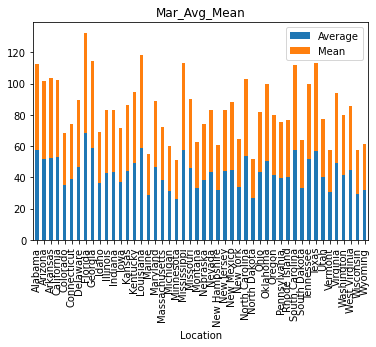

In [44]:
clean_df1.plot(x='Location',y=['Average','Mean'],kind='bar',stacked=True,title='Mar_Avg_Mean')

plt.savefig('../static/images/Mar_Avg_Mean.png')
plt.show()

In [45]:
clean_df1.to_sql("mar_weather_data", connection, index=False,if_exists="replace")

In [46]:
pd.read_sql("SELECT * FROM mar_weather_data", connection)

,Location,Average,Mean
0,Alabama,57.5,55.1
1,Arizona,51.8,49.5
2,Arkansas,52.1,51.3
3,California,53.2,48.8
4,Colorado,34.9,33.7
5,Connecticut,38.9,35.4
6,Delaware,46.9,42.7
7,Florida,68.4,64
8,Georgia,59,55.4
9,Idaho,36.2,32.6


In [47]:
april_df = pd.read_excel('US Weather Data .xlsx',sheet_name='April',engine='openpyxl')
april_str = april_df.to_json()

print('Excel Sheet to JSON:\n', april_str)

Excel Sheet to JSON:
 {"April 2022 Contiguous U.S. Statewide Average Temperature":{"0":"Units: Degrees Fahrenheit","1":"Missing: -99","2":"Location ID","3":100,"4":200,"5":300,"6":400,"7":500,"8":600,"9":700,"10":800,"11":900,"12":1000,"13":1100,"14":1200,"15":1300,"16":1400,"17":1500,"18":1600,"19":1700,"20":1800,"21":1900,"22":2000,"23":2100,"24":2200,"25":2300,"26":2400,"27":2500,"28":2600,"29":2700,"30":2800,"31":2900,"32":3000,"33":3100,"34":3200,"35":3300,"36":3400,"37":3500,"38":3600,"39":3700,"40":3800,"41":3900,"42":4000,"43":4100,"44":4200,"45":4300,"46":4400,"47":4500,"48":4600,"49":4700,"50":4800},"Unnamed: 1":{"0":null,"1":"Rank out of 128 Years","2":"Location","3":"Alabama","4":"Arizona","5":"Arkansas","6":"California","7":"Colorado","8":"Connecticut","9":"Delaware","10":"Florida","11":"Georgia","12":"Idaho","13":"Illinois","14":"Indiana","15":"Iowa","16":"Kansas","17":"Kentucky","18":"Louisiana","19":"Maine","20":"Maryland","21":"Massachusetts","22":"Michigan","23":"Minn

In [48]:
#from json format to dataframe
Apr_df=pd.read_json(april_str,orient='index')
print(Apr_df)


                                                                           0   \
April 2022 Contiguous U.S. Statewide Average Te...  Units: Degrees Fahrenheit   
Unnamed: 1                                                               None   
Unnamed: 2                                                               None   
Unnamed: 3                                                               None   
Unnamed: 4                                                               None   
Unnamed: 5                                                               None   

                                                                       1   \
April 2022 Contiguous U.S. Statewide Average Te...           Missing: -99   
Unnamed: 1                                          Rank out of 128 Years   
Unnamed: 2                                                           None   
Unnamed: 3                                                           None   
Unnamed: 4                                     

In [49]:
#convert table
apr_df= Apr_df.transpose()
apr_df.head()


,April 2022 Contiguous U.S. Statewide Average Temperature,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,62.5,59,-0.3,62.8
4,200,Arizona,60.8,117,4.1,56.7


In [50]:
april_df=apr_df.rename(columns={'Unnamed: 1' :'Location','Unnamed: 2':'Average','Unnamed: 5':'Mean'})
april_df.head()


,April 2022 Contiguous U.S. Statewide Average Temperature,Location,Average,Unnamed: 3,Unnamed: 4,Mean
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,62.5,59,-0.3,62.8
4,200,Arizona,60.8,117,4.1,56.7


In [51]:
new_df=april_df[['Location','Average','Mean']]
new_df.head()



,Location,Average,Mean
0,None,None,None
1,Rank out of 128 Years,None,None
2,Location,Value,1901-2000 Mean
3,Alabama,62.5,62.8
4,Arizona,60.8,56.7


In [52]:
clean_df=new_df.drop(new_df.index[[0,2]])
clean_df


,Location,Average,Mean
1,Rank out of 128 Years,None,None
3,Alabama,62.5,62.8
4,Arizona,60.8,56.7
5,Arkansas,59.9,60.5
6,California,55.9,54
7,Colorado,43.7,42.5
8,Connecticut,47.6,46
9,Delaware,53,52
10,Florida,71.8,69.3
11,Georgia,63.1,63


In [53]:
clean_df1=clean_df.drop(clean_df.index[0])
clean_df1

,Location,Average,Mean
3,Alabama,62.5,62.8
4,Arizona,60.8,56.7
5,Arkansas,59.9,60.5
6,California,55.9,54
7,Colorado,43.7,42.5
8,Connecticut,47.6,46
9,Delaware,53,52
10,Florida,71.8,69.3
11,Georgia,63.1,63
12,Idaho,37,41


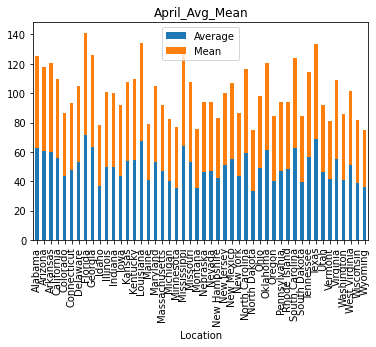

In [54]:
clean_df1.plot(x='Location',y=['Average','Mean'],kind='bar',stacked=True,title='April_Avg_Mean')

plt.savefig('../static/images/April_Avg_Mean.png')
plt.show()

In [55]:
clean_df1.to_sql("April_weather_data", connection, index=False,if_exists="replace")

In [56]:
pd.read_sql("SELECT * FROM April_weather_data", connection)

,Location,Average,Mean
0,Alabama,62.5,62.8
1,Arizona,60.8,56.7
2,Arkansas,59.9,60.5
3,California,55.9,54
4,Colorado,43.7,42.5
5,Connecticut,47.6,46
6,Delaware,53,52
7,Florida,71.8,69.3
8,Georgia,63.1,63
9,Idaho,37,41


In [57]:
may_df = pd.read_excel('US Weather Data .xlsx',sheet_name='May',engine='openpyxl')
may_str = may_df.to_json()

print('Excel Sheet to JSON:\n', may_str)

Excel Sheet to JSON:
 {"May 2022 Contiguous U.S. Statewide Average Temperature":{"0":"Units: Degrees Fahrenheit","1":"Missing: -99","2":"Location ID","3":100,"4":200,"5":300,"6":400,"7":500,"8":600,"9":700,"10":800,"11":900,"12":1000,"13":1100,"14":1200,"15":1300,"16":1400,"17":1500,"18":1600,"19":1700,"20":1800,"21":1900,"22":2000,"23":2100,"24":2200,"25":2300,"26":2400,"27":2500,"28":2600,"29":2700,"30":2800,"31":2900,"32":3000,"33":3100,"34":3200,"35":3300,"36":3400,"37":3500,"38":3600,"39":3700,"40":3800,"41":3900,"42":4000,"43":4100,"44":4200,"45":4300,"46":4400,"47":4500,"48":4600,"49":4700,"50":4800},"Unnamed: 1":{"0":null,"1":"Rank out of 128 Years","2":"Location","3":"Alabama","4":"Arizona","5":"Arkansas","6":"California","7":"Colorado","8":"Connecticut","9":"Delaware","10":"Florida","11":"Georgia","12":"Idaho","13":"Illinois","14":"Indiana","15":"Iowa","16":"Kansas","17":"Kentucky","18":"Louisiana","19":"Maine","20":"Maryland","21":"Massachusetts","22":"Michigan","23":"Minnes

In [58]:
#from json format to dataframe
may_df=pd.read_json(may_str,orient='index')
print(may_df)


                                                                           0   \
May 2022 Contiguous U.S. Statewide Average Temp...  Units: Degrees Fahrenheit   
Unnamed: 1                                                               None   
Unnamed: 2                                                               None   
Unnamed: 3                                                               None   
Unnamed: 4                                                               None   
Unnamed: 5                                                               None   

                                                                       1   \
May 2022 Contiguous U.S. Statewide Average Temp...           Missing: -99   
Unnamed: 1                                          Rank out of 128 Years   
Unnamed: 2                                                           None   
Unnamed: 3                                                           None   
Unnamed: 4                                     

In [59]:
#convert table
may_df= may_df.transpose()
may_df.head()

,May 2022 Contiguous U.S. Statewide Average Temperature,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,73.5,114,2.8,70.7
4,200,Arizona,68.6,116,3.6,65


In [60]:
may1_df=may_df.rename(columns={'Unnamed: 1' :'Location','Unnamed: 2':'Average','Unnamed: 5':'Mean'})
may1_df.head()


,May 2022 Contiguous U.S. Statewide Average Temperature,Location,Average,Unnamed: 3,Unnamed: 4,Mean
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,73.5,114,2.8,70.7
4,200,Arizona,68.6,116,3.6,65


In [61]:
new_df=may1_df[['Location','Average','Mean']]
new_df.head()


,Location,Average,Mean
0,None,None,None
1,Rank out of 128 Years,None,None
2,Location,Value,1901-2000 Mean
3,Alabama,73.5,70.7
4,Arizona,68.6,65


In [62]:
clean_df=new_df.drop(new_df.index[[0,2]])
clean_df


,Location,Average,Mean
1,Rank out of 128 Years,None,None
3,Alabama,73.5,70.7
4,Arizona,68.6,65
5,Arkansas,71,68.6
6,California,62.3,60.7
7,Colorado,53.3,51.8
8,Connecticut,60.6,56.8
9,Delaware,64.4,62.1
10,Florida,77.6,75.1
11,Georgia,73.3,71


In [63]:
clean_df1=clean_df.drop(clean_df.index[0])
clean_df1

,Location,Average,Mean
3,Alabama,73.5,70.7
4,Arizona,68.6,65
5,Arkansas,71,68.6
6,California,62.3,60.7
7,Colorado,53.3,51.8
8,Connecticut,60.6,56.8
9,Delaware,64.4,62.1
10,Florida,77.6,75.1
11,Georgia,73.3,71
12,Idaho,46.1,49.3


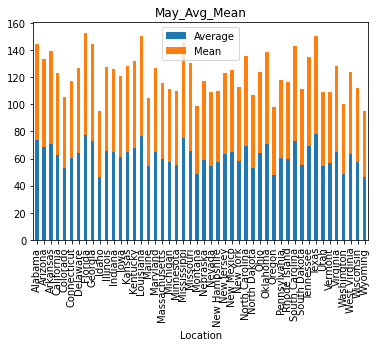

In [64]:
clean_df1.plot(x='Location',y=['Average','Mean'],kind='bar',stacked=True,title='May_Avg_Mean')

plt.savefig('../static/images/May_Avg_Mean.png')
plt.show()

In [65]:
clean_df1.to_sql("May_weather_data", connection, index=False,if_exists="replace")

In [66]:
pd.read_sql("SELECT * FROM May_weather_data", connection)

,Location,Average,Mean
0,Alabama,73.5,70.7
1,Arizona,68.6,65
2,Arkansas,71,68.6
3,California,62.3,60.7
4,Colorado,53.3,51.8
5,Connecticut,60.6,56.8
6,Delaware,64.4,62.1
7,Florida,77.6,75.1
8,Georgia,73.3,71
9,Idaho,46.1,49.3


In [67]:
June_df = pd.read_excel('US Weather Data .xlsx',sheet_name='June',engine='openpyxl')
june_str = June_df.to_json()

print('Excel Sheet to JSON:\n', june_str)

Excel Sheet to JSON:
 {"June 2022 Contiguous U.S. Statewide Average Temperature":{"0":"Units: Degrees Fahrenheit","1":"Missing: -99","2":"Location ID","3":100,"4":200,"5":300,"6":400,"7":500,"8":600,"9":700,"10":800,"11":900,"12":1000,"13":1100,"14":1200,"15":1300,"16":1400,"17":1500,"18":1600,"19":1700,"20":1800,"21":1900,"22":2000,"23":2100,"24":2200,"25":2300,"26":2400,"27":2500,"28":2600,"29":2700,"30":2800,"31":2900,"32":3000,"33":3100,"34":3200,"35":3300,"36":3400,"37":3500,"38":3600,"39":3700,"40":3800,"41":3900,"42":4000,"43":4100,"44":4200,"45":4300,"46":4400,"47":4500,"48":4600,"49":4700,"50":4800},"Unnamed: 1":{"0":null,"1":"Rank out of 128 Years","2":"Location","3":"Alabama","4":"Arizona","5":"Arkansas","6":"California","7":"Colorado","8":"Connecticut","9":"Delaware","10":"Florida","11":"Georgia","12":"Idaho","13":"Illinois","14":"Indiana","15":"Iowa","16":"Kansas","17":"Kentucky","18":"Louisiana","19":"Maine","20":"Maryland","21":"Massachusetts","22":"Michigan","23":"Minne

In [68]:
#from json format to dataframe
Jun_df=pd.read_json(june_str,orient='index')
print(Jun_df)


                                                                           0   \
June 2022 Contiguous U.S. Statewide Average Tem...  Units: Degrees Fahrenheit   
Unnamed: 1                                                               None   
Unnamed: 2                                                               None   
Unnamed: 3                                                               None   
Unnamed: 4                                                               None   
Unnamed: 5                                                               None   

                                                                       1   \
June 2022 Contiguous U.S. Statewide Average Tem...           Missing: -99   
Unnamed: 1                                          Rank out of 128 Years   
Unnamed: 2                                                           None   
Unnamed: 3                                                           None   
Unnamed: 4                                     

In [69]:
#convert table
june_df= Jun_df.transpose()
june_df.head()


,June 2022 Contiguous U.S. Statewide Average Temperature,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,80.3,115,2.8,77.5
4,200,Arizona,78.7,119,4.3,74.4


In [70]:
JUNE_df=june_df.rename(columns={'Unnamed: 1' :'Location','Unnamed: 2':'Average','Unnamed: 5':'Mean'})
JUNE_df.head()


,June 2022 Contiguous U.S. Statewide Average Temperature,Location,Average,Unnamed: 3,Unnamed: 4,Mean
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,80.3,115,2.8,77.5
4,200,Arizona,78.7,119,4.3,74.4


In [71]:
new_df=JUNE_df[['Location','Average','Mean']]
new_df.head()


,Location,Average,Mean
0,None,None,None
1,Rank out of 128 Years,None,None
2,Location,Value,1901-2000 Mean
3,Alabama,80.3,77.5
4,Arizona,78.7,74.4


In [72]:
clean_df=new_df.drop(new_df.index[[0,2]])
clean_df


,Location,Average,Mean
1,Rank out of 128 Years,None,None
3,Alabama,80.3,77.5
4,Arizona,78.7,74.4
5,Arkansas,78.1,76.5
6,California,72.1,68.3
7,Colorado,64.3,61.2
8,Connecticut,66.3,65.4
9,Delaware,72,70.7
10,Florida,82,79.5
11,Georgia,80,77.4


In [73]:
clean_df1=clean_df.drop(clean_df.index[0])
clean_df1

,Location,Average,Mean
3,Alabama,80.3,77.5
4,Arizona,78.7,74.4
5,Arkansas,78.1,76.5
6,California,72.1,68.3
7,Colorado,64.3,61.2
8,Connecticut,66.3,65.4
9,Delaware,72,70.7
10,Florida,82,79.5
11,Georgia,80,77.4
12,Idaho,57.1,56.7


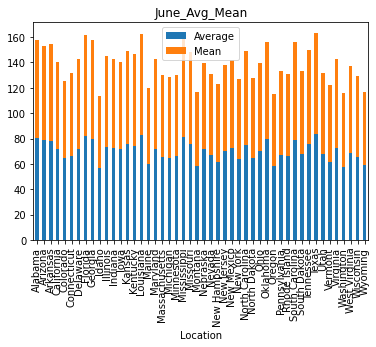

In [74]:
clean_df1.plot(x='Location',y=['Average','Mean'],kind='bar',stacked=True,title='June_Avg_Mean')

plt.savefig('../static/images/June_Avg_Mean.png')
plt.show()

In [75]:
clean_df1.to_sql("June_weather_data", connection, index=False,if_exists="replace")

In [76]:
pd.read_sql("SELECT * FROM June_weather_data", connection)

,Location,Average,Mean
0,Alabama,80.3,77.5
1,Arizona,78.7,74.4
2,Arkansas,78.1,76.5
3,California,72.1,68.3
4,Colorado,64.3,61.2
5,Connecticut,66.3,65.4
6,Delaware,72,70.7
7,Florida,82,79.5
8,Georgia,80,77.4
9,Idaho,57.1,56.7


In [77]:
july_df = pd.read_excel('US Weather Data .xlsx',sheet_name='July',engine='openpyxl')
july_str = july_df.to_json()

print('Excel Sheet to JSON:\n', july_str)

Excel Sheet to JSON:
 {"July 2022 Contiguous U.S. Statewide Average Temperature":{"0":"Units: Degrees Fahrenheit","1":"Missing: -99","2":"Location ID","3":100,"4":200,"5":300,"6":400,"7":500,"8":600,"9":700,"10":800,"11":900,"12":1000,"13":1100,"14":1200,"15":1300,"16":1400,"17":1500,"18":1600,"19":1700,"20":1800,"21":1900,"22":2000,"23":2100,"24":2200,"25":2300,"26":2400,"27":2500,"28":2600,"29":2700,"30":2800,"31":2900,"32":3000,"33":3100,"34":3200,"35":3300,"36":3400,"37":3500,"38":3600,"39":3700,"40":3800,"41":3900,"42":4000,"43":4100,"44":4200,"45":4300,"46":4400,"47":4500,"48":4600,"49":4700,"50":4800},"Unnamed: 1":{"0":null,"1":"Rank out of 128 Years","2":"Location","3":"Alabama","4":"Arizona","5":"Arkansas","6":"California","7":"Colorado","8":"Connecticut","9":"Delaware","10":"Florida","11":"Georgia","12":"Idaho","13":"Illinois","14":"Indiana","15":"Iowa","16":"Kansas","17":"Kentucky","18":"Louisiana","19":"Maine","20":"Maryland","21":"Massachusetts","22":"Michigan","23":"Minne

In [78]:
#from json format to dataframe
July_df=pd.read_json(july_str,orient='index')
print(July_df)


                                                                           0   \
July 2022 Contiguous U.S. Statewide Average Tem...  Units: Degrees Fahrenheit   
Unnamed: 1                                                               None   
Unnamed: 2                                                               None   
Unnamed: 3                                                               None   
Unnamed: 4                                                               None   
Unnamed: 5                                                               None   

                                                                       1   \
July 2022 Contiguous U.S. Statewide Average Tem...           Missing: -99   
Unnamed: 1                                          Rank out of 128 Years   
Unnamed: 2                                                           None   
Unnamed: 3                                                           None   
Unnamed: 4                                     

In [79]:
#convert table
july_df= July_df.transpose()
july_df.head()

,July 2022 Contiguous U.S. Statewide Average Temperature,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,81.6,112,1.7,79.9
4,200,Arizona,82.1,117,2.4,79.7


In [80]:
JULY_df=july_df.rename(columns={'Unnamed: 1' :'Location','Unnamed: 2':'Average','Unnamed: 5':'Mean'})
JULY_df.head()


,July 2022 Contiguous U.S. Statewide Average Temperature,Location,Average,Unnamed: 3,Unnamed: 4,Mean
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,81.6,112,1.7,79.9
4,200,Arizona,82.1,117,2.4,79.7


In [81]:
new_df=JULY_df[['Location','Average','Mean']]
new_df.head()



,Location,Average,Mean
0,None,None,None
1,Rank out of 128 Years,None,None
2,Location,Value,1901-2000 Mean
3,Alabama,81.6,79.9
4,Arizona,82.1,79.7


In [82]:
clean_df=new_df.drop(new_df.index[[0,2]])
clean_df


,Location,Average,Mean
1,Rank out of 128 Years,None,None
3,Alabama,81.6,79.9
4,Arizona,82.1,79.7
5,Arkansas,84.1,80.3
6,California,77.6,74.7
7,Colorado,70.3,67.1
8,Connecticut,74.1,70.7
9,Delaware,78.5,75.5
10,Florida,83,81
11,Georgia,81.2,79.7


In [83]:
clean_df1=clean_df.drop(clean_df.index[0])
clean_df1

,Location,Average,Mean
3,Alabama,81.6,79.9
4,Arizona,82.1,79.7
5,Arkansas,84.1,80.3
6,California,77.6,74.7
7,Colorado,70.3,67.1
8,Connecticut,74.1,70.7
9,Delaware,78.5,75.5
10,Florida,83,81
11,Georgia,81.2,79.7
12,Idaho,69.4,65.1


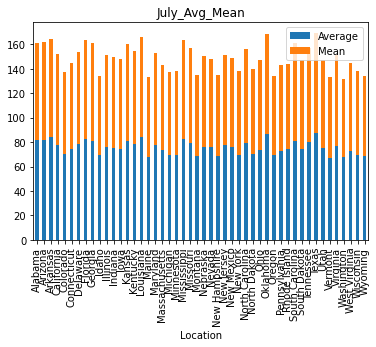

In [85]:
clean_df1.plot(x='Location',y=['Average','Mean'],kind='bar',stacked=True,title='July_Avg_Mean')

plt.savefig('../static/images/July_Avg_Mean.png')
plt.show()

In [86]:
clean_df1.to_sql("July_weather_data", connection, index=False,if_exists="replace")

In [87]:
pd.read_sql("SELECT * FROM July_weather_data", connection)

,Location,Average,Mean
0,Alabama,81.6,79.9
1,Arizona,82.1,79.7
2,Arkansas,84.1,80.3
3,California,77.6,74.7
4,Colorado,70.3,67.1
5,Connecticut,74.1,70.7
6,Delaware,78.5,75.5
7,Florida,83,81
8,Georgia,81.2,79.7
9,Idaho,69.4,65.1


In [88]:
aug_df = pd.read_excel('US Weather Data .xlsx',sheet_name='August',engine='openpyxl')
aug_str = aug_df.to_json()

print('Excel Sheet to JSON:\n', aug_str)

Excel Sheet to JSON:
 {"August 2022 Contiguous U.S. Statewide Average Temperature":{"0":"Units: Degrees Fahrenheit","1":"Missing: -99","2":"Location ID","3":100,"4":200,"5":300,"6":400,"7":500,"8":600,"9":700,"10":800,"11":900,"12":1000,"13":1100,"14":1200,"15":1300,"16":1400,"17":1500,"18":1600,"19":1700,"20":1800,"21":1900,"22":2000,"23":2100,"24":2200,"25":2300,"26":2400,"27":2500,"28":2600,"29":2700,"30":2800,"31":2900,"32":3000,"33":3100,"34":3200,"35":3300,"36":3400,"37":3500,"38":3600,"39":3700,"40":3800,"41":3900,"42":4000,"43":4100,"44":4200,"45":4300,"46":4400,"47":4500,"48":4600,"49":4700,"50":4800},"Unnamed: 1":{"0":null,"1":"Rank out of 128 Years","2":"Location","3":"Alabama","4":"Arizona","5":"Arkansas","6":"California","7":"Colorado","8":"Connecticut","9":"Delaware","10":"Florida","11":"Georgia","12":"Idaho","13":"Illinois","14":"Indiana","15":"Iowa","16":"Kansas","17":"Kentucky","18":"Louisiana","19":"Maine","20":"Maryland","21":"Massachusetts","22":"Michigan","23":"Min

In [89]:
#from json format to dataframe
aug_df=pd.read_json(aug_str,orient='index')
print(aug_df)


                                                                           0   \
August 2022 Contiguous U.S. Statewide Average T...  Units: Degrees Fahrenheit   
Unnamed: 1                                                               None   
Unnamed: 2                                                               None   
Unnamed: 3                                                               None   
Unnamed: 4                                                               None   
Unnamed: 5                                                               None   

                                                                       1   \
August 2022 Contiguous U.S. Statewide Average T...           Missing: -99   
Unnamed: 1                                          Rank out of 128 Years   
Unnamed: 2                                                           None   
Unnamed: 3                                                           None   
Unnamed: 4                                     

In [90]:
#convert table
ag1_df= aug_df.transpose()
ag1_df.head()


,August 2022 Contiguous U.S. Statewide Average Temperature,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,79.2,58,-0.1,79.3
4,200,Arizona,78.8,87,1,77.8


In [91]:
aug_df=ag1_df.rename(columns={'Unnamed: 1' :'Location','Unnamed: 2':'Average','Unnamed: 5':'Mean'})
aug_df.head()


,August 2022 Contiguous U.S. Statewide Average Temperature,Location,Average,Unnamed: 3,Unnamed: 4,Mean
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,79.2,58,-0.1,79.3
4,200,Arizona,78.8,87,1,77.8


In [92]:
new_df=aug_df[['Location','Average','Mean']]
new_df.head()

,Location,Average,Mean
0,None,None,None
1,Rank out of 128 Years,None,None
2,Location,Value,1901-2000 Mean
3,Alabama,79.2,79.3
4,Arizona,78.8,77.8


In [93]:
clean_df=new_df.drop(new_df.index[[0,2]])
clean_df


,Location,Average,Mean
1,Rank out of 128 Years,None,None
3,Alabama,79.2,79.3
4,Arizona,78.8,77.8
5,Arkansas,79.4,79.3
6,California,78.4,73.7
7,Colorado,67.8,65.2
8,Connecticut,74.4,68.6
9,Delaware,77.7,73.7
10,Florida,82.8,81
11,Georgia,79.5,79


In [94]:
clean_df1=clean_df.drop(clean_df.index[0])
clean_df1

,Location,Average,Mean
3,Alabama,79.2,79.3
4,Arizona,78.8,77.8
5,Arkansas,79.4,79.3
6,California,78.4,73.7
7,Colorado,67.8,65.2
8,Connecticut,74.4,68.6
9,Delaware,77.7,73.7
10,Florida,82.8,81
11,Georgia,79.5,79
12,Idaho,69.4,63.6


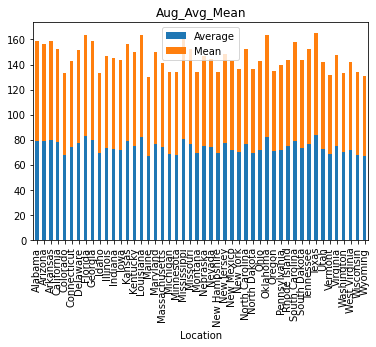

In [95]:
clean_df1.plot(x='Location',y=['Average','Mean'],kind='bar',stacked=True,title='Aug_Avg_Mean')

plt.savefig('../static/images/Aug_Avg_Mean.png')
plt.show()

In [96]:
clean_df1.to_sql("Aug_weather_data", connection, index=False,if_exists="replace")

In [97]:
pd.read_sql("SELECT * FROM Aug_weather_data", connection)

,Location,Average,Mean
0,Alabama,79.2,79.3
1,Arizona,78.8,77.8
2,Arkansas,79.4,79.3
3,California,78.4,73.7
4,Colorado,67.8,65.2
5,Connecticut,74.4,68.6
6,Delaware,77.7,73.7
7,Florida,82.8,81
8,Georgia,79.5,79
9,Idaho,69.4,63.6


In [98]:
sep_df = pd.read_excel('US Weather Data .xlsx',sheet_name='September',engine='openpyxl')
sep_str = sep_df.to_json()

print('Excel Sheet to JSON:\n', sep_str)

Excel Sheet to JSON:
 {"September 2022 Contiguous U.S. Statewide Average Temperature":{"0":"Units: Degrees Fahrenheit","1":"Missing: -99","2":"Location ID","3":100,"4":200,"5":300,"6":400,"7":500,"8":600,"9":700,"10":800,"11":900,"12":1000,"13":1100,"14":1200,"15":1300,"16":1400,"17":1500,"18":1600,"19":1700,"20":1800,"21":1900,"22":2000,"23":2100,"24":2200,"25":2300,"26":2400,"27":2500,"28":2600,"29":2700,"30":2800,"31":2900,"32":3000,"33":3100,"34":3200,"35":3300,"36":3400,"37":3500,"38":3600,"39":3700,"40":3800,"41":3900,"42":4000,"43":4100,"44":4200,"45":4300,"46":4400,"47":4500,"48":4600,"49":4700,"50":4800},"Unnamed: 1":{"0":null,"1":"Rank out of 128 Years","2":"Location","3":"Alabama","4":"Arizona","5":"Arkansas","6":"California","7":"Colorado","8":"Connecticut","9":"Delaware","10":"Florida","11":"Georgia","12":"Idaho","13":"Illinois","14":"Indiana","15":"Iowa","16":"Kansas","17":"Kentucky","18":"Louisiana","19":"Maine","20":"Maryland","21":"Massachusetts","22":"Michigan","23":"

In [99]:
#from json format to dataframe
sep_df=pd.read_json(sep_str,orient='index')
print(sep_df)


                                                                           0   \
September 2022 Contiguous U.S. Statewide Averag...  Units: Degrees Fahrenheit   
Unnamed: 1                                                               None   
Unnamed: 2                                                               None   
Unnamed: 3                                                               None   
Unnamed: 4                                                               None   
Unnamed: 5                                                               None   

                                                                       1   \
September 2022 Contiguous U.S. Statewide Averag...           Missing: -99   
Unnamed: 1                                          Rank out of 128 Years   
Unnamed: 2                                                           None   
Unnamed: 3                                                           None   
Unnamed: 4                                     

In [100]:
#convert table
sep1_df= sep_df.transpose()
sep1_df.head()

,September 2022 Contiguous U.S. Statewide Average Temperature,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,73.8,50,-0.9,74.7
4,200,Arizona,75.8,127,3.8,72


In [101]:
sep_df=sep1_df.rename(columns={'Unnamed: 1' :'Location','Unnamed: 2':'Average','Unnamed: 5':'Mean'})
sep_df.head()

,September 2022 Contiguous U.S. Statewide Average Temperature,Location,Average,Unnamed: 3,Unnamed: 4,Mean
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,73.8,50,-0.9,74.7
4,200,Arizona,75.8,127,3.8,72


In [102]:
new_df=sep_df[['Location','Average','Mean']]
new_df.head()



,Location,Average,Mean
0,None,None,None
1,Rank out of 128 Years,None,None
2,Location,Value,1901-2000 Mean
3,Alabama,73.8,74.7
4,Arizona,75.8,72


In [103]:
clean_df=new_df.drop(new_df.index[[0,2]])
clean_df


,Location,Average,Mean
1,Rank out of 128 Years,None,None
3,Alabama,73.8,74.7
4,Arizona,75.8,72
5,Arkansas,73.8,72.8
6,California,73.6,68.5
7,Colorado,62.5,57.3
8,Connecticut,63.5,61.5
9,Delaware,68.8,67.4
10,Florida,79.9,79.1
11,Georgia,73.9,74.5


In [104]:
clean_df1=clean_df.drop(clean_df.index[0])
clean_df1

,Location,Average,Mean
3,Alabama,73.8,74.7
4,Arizona,75.8,72
5,Arkansas,73.8,72.8
6,California,73.6,68.5
7,Colorado,62.5,57.3
8,Connecticut,63.5,61.5
9,Delaware,68.8,67.4
10,Florida,79.9,79.1
11,Georgia,73.9,74.5
12,Idaho,60.7,54.7


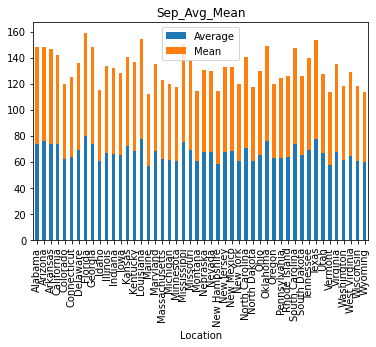

In [106]:
clean_df1.plot(x='Location',y=['Average','Mean'],kind='bar',stacked=True,title='Sep_Avg_Mean')

plt.savefig('../static/images/Sep_Avg_Mean.png')
plt.show()

In [107]:
clean_df1.to_sql("Sep_weather_data", connection, index=False,if_exists="replace")

In [108]:
pd.read_sql("SELECT * FROM Sep_weather_data", connection)

,Location,Average,Mean
0,Alabama,73.8,74.7
1,Arizona,75.8,72
2,Arkansas,73.8,72.8
3,California,73.6,68.5
4,Colorado,62.5,57.3
5,Connecticut,63.5,61.5
6,Delaware,68.8,67.4
7,Florida,79.9,79.1
8,Georgia,73.9,74.5
9,Idaho,60.7,54.7


In [109]:
oct_df = pd.read_excel('US Weather Data .xlsx',sheet_name='October',engine='openpyxl')
oct_str = oct_df.to_json()

print('Excel Sheet to JSON:\n', oct_str)

Excel Sheet to JSON:
 {"October 2022 Contiguous U.S. Statewide Average Temperature":{"0":"Units: Degrees Fahrenheit","1":"Missing: -99","2":"Location ID","3":100,"4":200,"5":300,"6":400,"7":500,"8":600,"9":700,"10":800,"11":900,"12":1000,"13":1100,"14":1200,"15":1300,"16":1400,"17":1500,"18":1600,"19":1700,"20":1800,"21":1900,"22":2000,"23":2100,"24":2200,"25":2300,"26":2400,"27":2500,"28":2600,"29":2700,"30":2800,"31":2900,"32":3000,"33":3100,"34":3200,"35":3300,"36":3400,"37":3500,"38":3600,"39":3700,"40":3800,"41":3900,"42":4000,"43":4100,"44":4200,"45":4300,"46":4400,"47":4500,"48":4600,"49":4700,"50":4800},"Unnamed: 1":{"0":null,"1":"Rank out of 128 Years","2":"Location","3":"Alabama","4":"Arizona","5":"Arkansas","6":"California","7":"Colorado","8":"Connecticut","9":"Delaware","10":"Florida","11":"Georgia","12":"Idaho","13":"Illinois","14":"Indiana","15":"Iowa","16":"Kansas","17":"Kentucky","18":"Louisiana","19":"Maine","20":"Maryland","21":"Massachusetts","22":"Michigan","23":"Mi

In [110]:
#from json format to dataframe
oct_df=pd.read_json(oct_str,orient='index')
print(oct_df)


                                                                           0   \
October 2022 Contiguous U.S. Statewide Average ...  Units: Degrees Fahrenheit   
Unnamed: 1                                                               None   
Unnamed: 2                                                               None   
Unnamed: 3                                                               None   
Unnamed: 4                                                               None   
Unnamed: 5                                                               None   

                                                                       1   \
October 2022 Contiguous U.S. Statewide Average ...           Missing: -99   
Unnamed: 1                                          Rank out of 128 Years   
Unnamed: 2                                                           None   
Unnamed: 3                                                           None   
Unnamed: 4                                     

In [111]:
#convert table
oct1_df= oct_df.transpose()
oct1_df.head()


,October 2022 Contiguous U.S. Statewide Average Temperature,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,61.3,20,-2.6,63.9
4,200,Arizona,61.6,78,0.6,61


In [112]:
october_df=oct1_df.rename(columns={'Unnamed: 1' :'Location','Unnamed: 2':'Average','Unnamed: 5':'Mean'})
october_df.head()

,October 2022 Contiguous U.S. Statewide Average Temperature,Location,Average,Unnamed: 3,Unnamed: 4,Mean
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,61.3,20,-2.6,63.9
4,200,Arizona,61.6,78,0.6,61


In [113]:
new_df=october_df[['Location','Average','Mean']]
new_df.head()


,Location,Average,Mean
0,None,None,None
1,Rank out of 128 Years,None,None
2,Location,Value,1901-2000 Mean
3,Alabama,61.3,63.9
4,Arizona,61.6,61


In [114]:
clean_df=new_df.drop(new_df.index[[0,2]])
clean_df


,Location,Average,Mean
1,Rank out of 128 Years,None,None
3,Alabama,61.3,63.9
4,Arizona,61.6,61
5,Arkansas,61.3,61.8
6,California,64.2,59.5
7,Colorado,47.6,46.5
8,Connecticut,52.4,51
9,Delaware,56.2,56.4
10,Florida,71.7,72.3
11,Georgia,62.1,64.2


In [115]:
clean_df1=clean_df.drop(clean_df.index[0])
clean_df1

,Location,Average,Mean
3,Alabama,61.3,63.9
4,Arizona,61.6,61
5,Arkansas,61.3,61.8
6,California,64.2,59.5
7,Colorado,47.6,46.5
8,Connecticut,52.4,51
9,Delaware,56.2,56.4
10,Florida,71.7,72.3
11,Georgia,62.1,64.2
12,Idaho,48,44.1


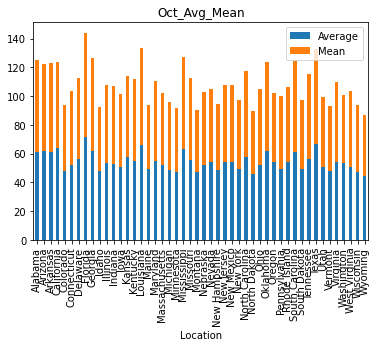

In [116]:
clean_df1.plot(x='Location',y=['Average','Mean'],kind='bar',stacked=True,title='Oct_Avg_Mean')

plt.savefig('../static/images/Oct_Avg_Mean.png')
plt.show()

In [117]:
clean_df1.to_sql("Oct_weather_data", connection, index=False,if_exists="replace")

In [118]:
pd.read_sql("SELECT * FROM Oct_weather_data", connection)

,Location,Average,Mean
0,Alabama,61.3,63.9
1,Arizona,61.6,61
2,Arkansas,61.3,61.8
3,California,64.2,59.5
4,Colorado,47.6,46.5
5,Connecticut,52.4,51
6,Delaware,56.2,56.4
7,Florida,71.7,72.3
8,Georgia,62.1,64.2
9,Idaho,48,44.1


In [119]:
nov_df = pd.read_excel('US Weather Data .xlsx',sheet_name='November ',engine='openpyxl')

nov_str = nov_df.to_json()

print('Excel Sheet to JSON:\n', nov_str)

Excel Sheet to JSON:
 {"November 2022 Contiguous U.S. Statewide Average Temperature":{"0":"Units: Degrees Fahrenheit","1":"Missing: -99","2":"Location ID","3":100,"4":200,"5":300,"6":400,"7":500,"8":600,"9":700,"10":800,"11":900,"12":1000,"13":1100,"14":1200,"15":1300,"16":1400,"17":1500,"18":1600,"19":1700,"20":1800,"21":1900,"22":2000,"23":2100,"24":2200,"25":2300,"26":2400,"27":2500,"28":2600,"29":2700,"30":2800,"31":2900,"32":3000,"33":3100,"34":3200,"35":3300,"36":3400,"37":3500,"38":3600,"39":3700,"40":3800,"41":3900,"42":4000,"43":4100,"44":4200,"45":4300,"46":4400,"47":4500,"48":4600,"49":4700,"50":4800},"Unnamed: 1":{"0":null,"1":"Rank out of 128 Years","2":"Location","3":"Alabama","4":"Arizona","5":"Arkansas","6":"California","7":"Colorado","8":"Connecticut","9":"Delaware","10":"Florida","11":"Georgia","12":"Idaho","13":"Illinois","14":"Indiana","15":"Iowa","16":"Kansas","17":"Kentucky","18":"Louisiana","19":"Maine","20":"Maryland","21":"Massachusetts","22":"Michigan","23":"M

In [120]:
#from json format to dataframe
nov_df=pd.read_json(nov_str,orient='index')
print(nov_df)


                                                                           0   \
November 2022 Contiguous U.S. Statewide Average...  Units: Degrees Fahrenheit   
Unnamed: 1                                                               None   
Unnamed: 2                                                               None   
Unnamed: 3                                                               None   
Unnamed: 4                                                               None   
Unnamed: 5                                                               None   

                                                                       1   \
November 2022 Contiguous U.S. Statewide Average...           Missing: -99   
Unnamed: 1                                          Rank out of 128 Years   
Unnamed: 2                                                           None   
Unnamed: 3                                                           None   
Unnamed: 4                                     

In [121]:
#convert table
no_df= nov_df.transpose()
no_df.head()

,November 2022 Contiguous U.S. Statewide Average Temperature,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,55.3,88,1.8,53.5
4,200,Arizona,46.2,15,-3,49.2


In [122]:
no_df=no_df.rename(columns={'Unnamed: 1' :'Location','Unnamed: 2':'Average','Unnamed: 5':'Mean'})
no_df.head()


,November 2022 Contiguous U.S. Statewide Average Temperature,Location,Average,Unnamed: 3,Unnamed: 4,Mean
0,Units: Degrees Fahrenheit,None,None,None,None,None
1,Missing: -99,Rank out of 128 Years,None,None,None,None
2,Location ID,Location,Value,Rank,Anomaly (1901-2000 base period),1901-2000 Mean
3,100,Alabama,55.3,88,1.8,53.5
4,200,Arizona,46.2,15,-3,49.2


In [123]:
new_df=no_df[['Location','Average','Mean']]
new_df.head()


,Location,Average,Mean
0,None,None,None
1,Rank out of 128 Years,None,None
2,Location,Value,1901-2000 Mean
3,Alabama,55.3,53.5
4,Arizona,46.2,49.2


In [124]:
clean_df=new_df.drop(new_df.index[[0,2]])
clean_df


,Location,Average,Mean
1,Rank out of 128 Years,None,None
3,Alabama,55.3,53.5
4,Arizona,46.2,49.2
5,Arkansas,50,49.8
6,California,46.5,49.5
7,Colorado,31.3,33.5
8,Connecticut,45.1,40.2
9,Delaware,50.3,45.7
10,Florida,69.7,64.3
11,Georgia,57.6,54.2


In [125]:
clean_df1=clean_df.drop(clean_df.index[0])
clean_df1

,Location,Average,Mean
3,Alabama,55.3,53.5
4,Arizona,46.2,49.2
5,Arkansas,50,49.8
6,California,46.5,49.5
7,Colorado,31.3,33.5
8,Connecticut,45.1,40.2
9,Delaware,50.3,45.7
10,Florida,69.7,64.3
11,Georgia,57.6,54.2
12,Idaho,26,31.6


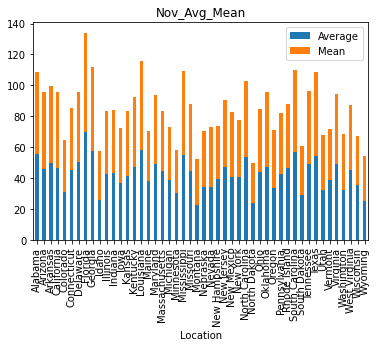

In [127]:
clean_df1.plot(x='Location',y=['Average','Mean'],kind='bar',stacked=True,title='Nov_Avg_Mean')

plt.savefig('../static/images/Nov_Avg_Mean.png')
plt.show()


In [128]:
clean_df1.to_sql("Nov_weather_data", connection, index=False,if_exists="replace")

In [129]:
pd.read_sql("SELECT * FROM Nov_weather_data", connection)

,Location,Average,Mean
0,Alabama,55.3,53.5
1,Arizona,46.2,49.2
2,Arkansas,50,49.8
3,California,46.5,49.5
4,Colorado,31.3,33.5
5,Connecticut,45.1,40.2
6,Delaware,50.3,45.7
7,Florida,69.7,64.3
8,Georgia,57.6,54.2
9,Idaho,26,31.6
